In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import math

# 2.1. 반올림 오차

## (1)점화식 그래프 그리기 1

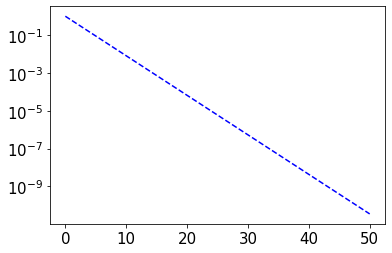

In [ ]:
golden = (np.sqrt(5)-1)/2
i_i_list = [1]

n = 0
while True:
  n += 1
  value = golden*i_i_list[-1]
  i_i_list.append(value)
  if n == 50:
    break

plt.plot(range(0,51),i_i_list,'b--')
plt.xticks(fontsize=15);plt.yticks(fontsize=15)
plt.yscale('log')

## (2)점화식 같음을 증명하기

(1)의 식은 [1, $\phi$, $\phi^2$, $\phi^3$...]형태로 나아가게 된다. $\phi^n=\phi^2$라고 가정하면, $\phi^{n-1}=\phi$, $\phi^{n+1}=\phi^3$로 나타난다.

(2)의 점화식에 대입하면 $\phi^3=\phi-\phi^2$로 나타내는데 $\phi$로 정리하고 항을 넘겨서 $\phi^2+\phi=1$로 나타낼 수 있다.

황금비의 정의에 의해서 $(\frac{\sqrt5-1}{2})^2+\frac{\sqrt5-1}{2}$로 나타낼 수 있고, $\frac{6-2\sqrt5}{4}+\frac{\sqrt5-1}{2}$=1이므로 증명이 된다.

## (3)점화식 그래프 그리기 2

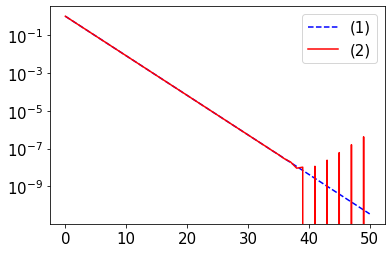

In [ ]:
i_ii_list = [1,golden]

n = 1
while True:
  n += 1
  value = i_ii_list[-2]-i_ii_list[-1]
  i_ii_list.append(value)
  if n == 50:
    break

plt.plot(range(0,51),i_i_list,'b--',label='(1)')
plt.plot(range(0,51),i_ii_list,'r-',label='(2)')
plt.xticks(fontsize=15);plt.yticks(fontsize=15)
plt.yscale('log')
plt.legend(fontsize=15)

## (4)다른 이유 설명하기

간단히 $n$이 커질수록 1보다 작은 수의 제곱 형태이므로 숫자가 엄청 작아지는데 비슷한 수$(\simeq0)$끼리의 뺄셈에서 $round-off$ 오류가 발생

# 2.2. 이항계수 구하기

## (1)$n=10$과 $n=100$일 때 최대값과 오차 구하기

In [ ]:
def bino(n):
  bino_list = []
  for k in range(n):
    if k == 0: bino_list.append(1)
    value = (n-k)*bino_list[k]
    bino_list.append(value/(k+1))
  return bino_list

In [ ]:
n1, n2 = 10, 100

n1_list, n2_list = bino(n1),bino(n2)

print(f'n=10 is max value: {max(n1_list)}, error: {1-n1_list[-1]}')
print(f'n=100 is max value: {max(n2_list)}, error: {1-n2_list[-1]}')

n=10 is max value: 252.0, error: 0.0
n=100 is max value: 1.0089134454556418e+29, error: 1.1102230246251565e-16


## (2)(1)의 오차를 주어진 식으로 구하기

In [ ]:
def bino_error(n,bino_list):
  cons = 1/2**n
  k_list = np.arange(0,n+1,1)
  value = k_list*np.array(bino_list)
  return cons*value.sum()

In [ ]:
print(f'n=10 is error: {2*bino_error(n1,n1_list)/(n1-1)}')
print(f'n=100 is error: {2*bino_error(n2,n2_list)/(n2-1)}')

n=10 is error: 1.1111111111111112
n=100 is error: 1.01010101010101


## $E(n)$가 정확도가 높은 것은 $k$가 변함에 따라 각 항에 $k$를 더함으로 가중치를 주고 $n$이 커짐에 따라 앞의 $2^n$도 커지기 때문

## (3)$E(10^4)$값 계산하기

# 2.3. 2차 방정식 반올림 오차

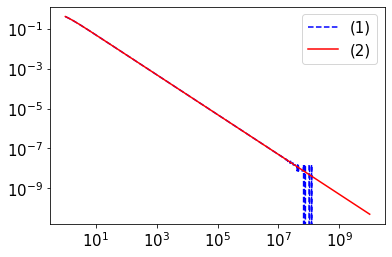

In [ ]:
def sol_1(b):
  return np.sqrt(b**2+1)-b
def sol_2(b):
  return 1/(np.sqrt(b**2+1)+b)

b_list = np.logspace(0,10,1000)

plt.plot(b_list,sol_1(b_list),'b--',label='(1)')
plt.plot(b_list,sol_2(b_list),'r-',label='(2)')
plt.xticks(fontsize=15);plt.yticks(fontsize=15)
plt.xscale('log');plt.yscale('log')
plt.legend(fontsize=15)

$sol_1(b)$ 식에서는 $b$가 커지면서 $\sqrt{b^2+1}-b$에서 비슷한 수끼리의 뺄셈이므로 반올림 오차가 발생하게 되고 그래프에 나타나게 된다

# 2.4. 다항 방정식 반올림 오차

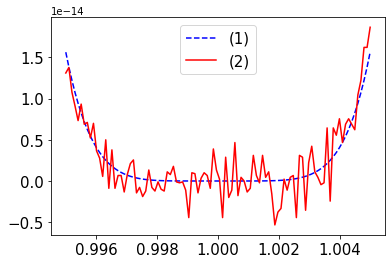

In [ ]:
x = np.linspace(0.995,1.005,100)
y_1 = (1-x)**6
y_2 = 1-6*x+15*x**2-20*x**3+15*x**4-6*x**5+x**6

plt.plot(x,y_1,'b--',label='(1)')
plt.plot(x,y_2,'r-',label='(2)')
plt.xticks(fontsize=15);plt.yticks(fontsize=15)
plt.legend(fontsize=15)

2.3의 식과 마찬가지로 $y_2$ 식에서는 비슷한 수끼리의 뺄셈이 여러번 발생하므로 반올림 오차가 생기고 그래프에 나타나게 된다

# 2.5. 유한급수의 오차

In [ ]:
def seri(n,reverse=False):
  sum = 0
  if reverse:
    ran=np.arange(n,0,-1)
  else:
    ran=np.arange(1,n+1,1)
  for j in ran:
    value = 1/(j*(j+2))
    sum += value
  return sum

## (1)작은 항부터 큰 항 순으로 더하기

In [ ]:
seri(10**7,True)

0.749999900000015

## (2)큰 항부터 작은 항 순으로 더하기

In [ ]:
seri(10**7)

0.7499998999997974

## (3)Kahan 알고리즘 이용

In [ ]:
def KahanSum(x):
  c,summ = 0,0
  for i in range(len(x)):
    xp = x[i]-c
    sp = summ
    summ+=xp
    c = ((sp+xp)-sp)-xp
  return summ

In [ ]:
num_list = np.arange(1,10**7 +1,1)
seri_list = 1/(num_list*(num_list+2))

KahanSum(seri_list)

0.7499999000000149

# 2.6. CORDIC 알고리즘과 numpy 결과 비교

In [ ]:
def CORDIC(beta):
  n = 50
  gamma = np.arctan(2.**(-np.arange(n)))
  x = np.array([1,0])
  for i in range(n):
    if beta < 0:
      sigma = -1
    else:
      sigma = 1
    beta-=sigma*gamma[i]
    factor = sigma * 2.**(-i)
    R = np.array([[1,-factor],[factor,1]])
    R = R/np.sqrt(1+factor**2)
    x = R@x
  return x

In [ ]:
degree = 23.7
rad = np.deg2rad(degree)

x = CORDIC(rad)
print('Cos=',x[0],np.cos(rad))
print('Sin=',x[1],np.sin(rad))

Cos= 0.9156625933395608 0.9156625933395611
Sin= 0.4019477766559607 0.4019477766559601


# 2.7. 테일러 급수에서 오차

In [ ]:
def taylor(x):
  n, sum = 0, 0
  while True:
    value = x**n/math.factorial(n)
    if abs(value) < 10**(-8): break
    sum = np.sum([sum,value])
    n += 1
  return sum

## (1)numpy와 비교

In [ ]:
for x in [10,-10]:
  print(f'x={x}, Taylor value: {taylor(x)}, numpy value: {np.exp(x)}, error: {abs(np.exp(x)-taylor(x))}')

x=10, Taylor value: 22026.4657948028, numpy value: 22026.465794806718, error: 3.918103175237775e-09
x=-10, Taylor value: 4.540234176855547e-05, numpy value: 4.5399929762484854e-05, error: 2.4120060706153408e-09


## (2)$x=10$이고 $x=-10$일 때, $x=n\log2+r$인 $n$과 $r$ 구하기

## (3)$e^r$의 근사식을 이용하여 (1)과 비교하기

# 2.8. 2계도함수의 오차 계산하기

In [ ]:
def derivative(fx,x,h):
  return (fx(x+h)-2*fx(x)+fx(x-h))/h**2

def fx(x):
  return np.power(np.e,-(x**2))

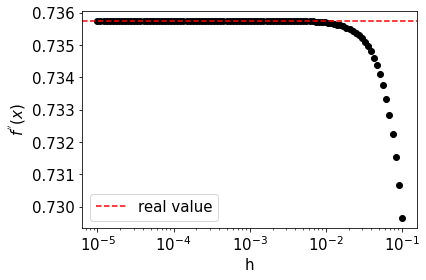

In [ ]:
for h in np.logspace(-5,-1,100):
  plt.scatter(h,derivative(fx,1,h),color='black')

x = 1
y = fx(x)
y_2prime = 4*x**2*y-2*y

plt.axhline(y_2prime,color='red',linestyle='--',label='real value')
plt.xlabel('h',fontsize=15);plt.ylabel(r"$f^{''}(x)$",fontsize=15)
plt.xticks(fontsize=15);plt.yticks(fontsize=15)
plt.xscale('log')
plt.legend(fontsize=15)